<a href="https://colab.research.google.com/github/KacperKurzydlo/LiquidCrystalPhases/blob/main/LCP_100x100_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

In [2]:
!pip install tensorflow==2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 123.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 59.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.8.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Praktyki/gotowe.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [6]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        horizontal_flip=True,
                                        vertical_flip=True)


In [7]:
train_dataset = training_generator.flow_from_directory('/content/gotowe/train_set',
                                                       target_size = (100, 100),
                                                       batch_size = 10,
                                                       color_mode='rgb',
                                                       class_mode = 'categorical',
                                                       shuffle = True)

Found 11158 images belonging to 7 classes.


In [8]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [9]:
train_dataset.class_indices

{'nematyk': 0,
 'smektyk_C': 1,
 'smektyk_F': 2,
 'smektyk_GMosaic': 3,
 'smektyk_GSchliren': 4,
 'smektyk_H': 5,
 'smektyk_I': 6}

In [10]:
test_generator = ImageDataGenerator(rescale=1./255)
val_generator = ImageDataGenerator(rescale=1./255)

In [11]:
validation_dataset = val_generator.flow_from_directory('/content/gotowe/val_set',
                                                        target_size=(100, 100),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                        shuffle=True) # set as validation data

Found 1395 images belonging to 7 classes.


In [12]:
L2 = 0.00001

In [13]:
test_datatset = test_generator.flow_from_directory('/content/gotowe/test_set',
                                                   target_size = (100, 100),
                                                   batch_size = 1,
                                                   color_mode='rgb',
                                                   class_mode = 'categorical',
                                                   shuffle = False)

Found 1396 images belonging to 7 classes.


In [14]:
initializer1 = tf.keras.initializers.HeNormal()
initializer2 = tf.keras.initializers.GlorotUniform()

In [137]:
network = Sequential()

network.add(Conv2D(filters=16, kernel_size=(3,3), activation = 'relu', input_shape = (100,100,3), kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(5,5), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=32, kernel_size=(5,5), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=64, kernel_size=(4,4), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=64, kernel_size=(4,4), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=64, kernel_size=(4,4), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(4,4), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=128, kernel_size=(4,4), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=128, kernel_size=(4,4), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=256, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=256, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=256, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=512, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

#network.add(Conv2D(filters=1024, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
#network.add(BatchNormalization())
#network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

#network.add(Dropout(0.2))

#network.add(Dense(units = 1024, activation = 'relu', kernel_initializer=initializer1))
#network.add(BatchNormalization())
network.add(Dense(units = 512, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 256, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 128, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 64, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 32, activation = 'relu', kernel_initializer=initializer1, kernel_regularizer=tf.keras.regularizers.L1L2()))
network.add(BatchNormalization())
network.add(Dense(units = 7, activation = 'softmax', kernel_initializer=initializer2))
network.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_117 (Conv2D)         (None, 98, 98, 16)        448       
                                                                 
 batch_normalization_141 (Ba  (None, 98, 98, 16)       64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_118 (Conv2D)         (None, 49, 49, 32)        12832     
                                                                 
 conv2d_119 (Conv2D)         (None, 49, 49, 32)        25632     
                                                                 
 batch_normalization_142 (Ba  (None, 49, 49, 32)     

In [138]:
from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=0.005)
opt = Adam()
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])


In [139]:
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.001, patience = 20, verbose =1)
model_cp = ModelCheckpoint(filepath = 'best_model1.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 5, verbose=1, factor=0.5, min_lr=0.00001)

In [140]:
history = network.fit_generator(train_dataset,
                                steps_per_epoch = 50,
                                validation_data = validation_dataset,
                                validation_steps = 50,
                                epochs=100,
                                callbacks=[es, model_cp, learning_rate_reduction])

Epoch 1/100


<ipython-input-140-d45876fe1552>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset,


50/50 [==============================] - ETA: 0s - loss: 2.0284 - accuracy: 0.2560
Epoch 1: val_accuracy improved from -inf to 0.22000, saving model to best_model1.h5
50/50 [==============================] - 31s 597ms/step - loss: 2.0284 - accuracy: 0.2560 - val_loss: 12.2572 - val_accuracy: 0.2200 - lr: 0.0010
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 1.6745 - accuracy: 0.3680
Epoch 2: val_accuracy did not improve from 0.22000
50/50 [==============================] - 29s 586ms/step - loss: 1.6745 - accuracy: 0.3680 - val_loss: 2.4067 - val_accuracy: 0.1200 - lr: 0.0010
Epoch 3/100
50/50 [==============================] - ETA: 0s - loss: 1.5034 - accuracy: 0.4440
Epoch 3: val_accuracy improved from 0.22000 to 0.28000, saving model to best_model1.h5
50/50 [==============================] - 29s 590ms/step - loss: 1.5034 - accuracy: 0.4440 - val_loss: 2.3113 - val_accuracy: 0.2800 - lr: 0.0010
Epoch 4/100
50/50 [==============================] - ETA: 0s - loss: 

In [141]:
predictions=network.predict(test_datatset)
predictions = np.argmax(predictions, axis=1)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(test_datatset.classes, predictions)

0.7643266475644699

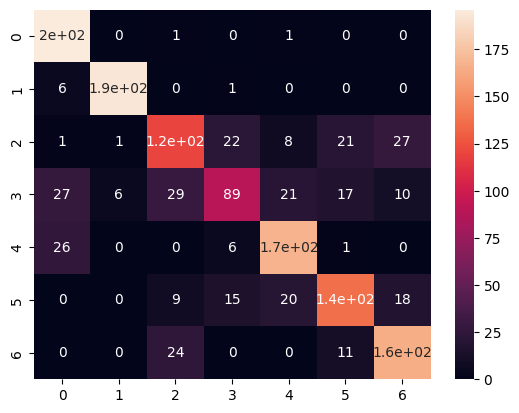

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_datatset.classes, predictions)
sns.heatmap(cm, annot=True);

In [144]:
from sklearn.metrics import classification_report
print(classification_report(test_datatset.classes, predictions))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       198
           1       0.96      0.96      0.96       200
           2       0.66      0.60      0.63       200
           3       0.67      0.45      0.54       199
           4       0.77      0.83      0.80       200
           5       0.73      0.69      0.71       199
           6       0.75      0.82      0.79       200

    accuracy                           0.76      1396
   macro avg       0.76      0.76      0.76      1396
weighted avg       0.76      0.76      0.76      1396



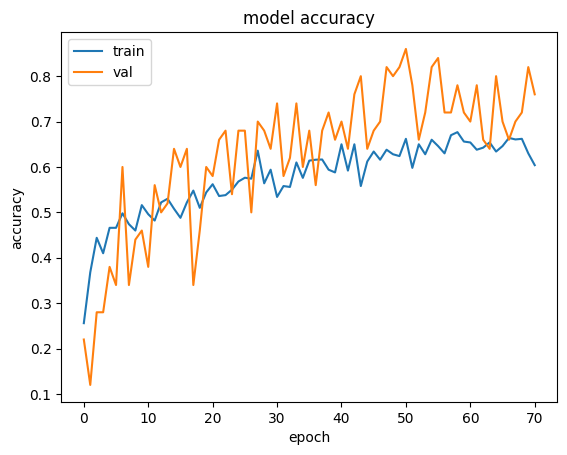

In [145]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

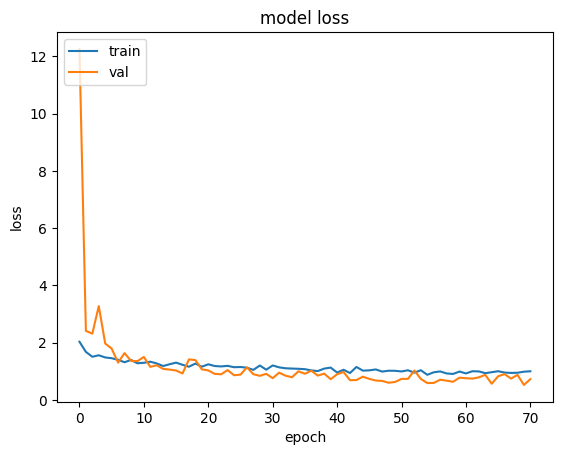

In [146]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [147]:
from tensorflow.keras.models import load_model
model = load_model('/content/best_model1.h5')

In [148]:
model.evaluate(test_datatset)

1396/1396 [==============================] - 26s 18ms/step - loss: 0.7254 - accuracy: 0.7529


[0.7253913879394531, 0.7528653144836426]

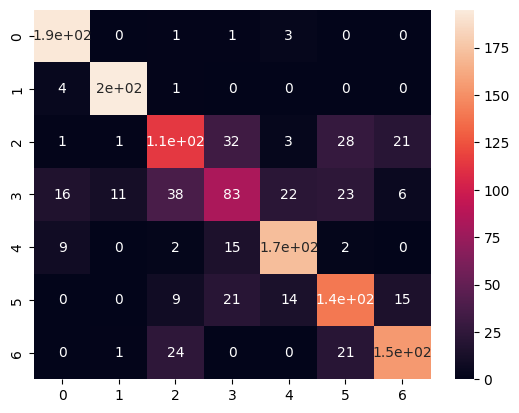

In [149]:
pred = model.predict(test_datatset)
pred = np.argmax(pred, axis=1)
cm = confusion_matrix(test_datatset.classes, pred)
sns.heatmap(cm, annot=True);

In [152]:
print(classification_report(test_datatset.classes, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       198
           1       0.94      0.97      0.96       200
           2       0.60      0.57      0.59       200
           3       0.55      0.42      0.47       199
           4       0.80      0.86      0.83       200
           5       0.65      0.70      0.68       199
           6       0.79      0.77      0.78       200

    accuracy                           0.75      1396
   macro avg       0.74      0.75      0.75      1396
weighted avg       0.74      0.75      0.75      1396



In [153]:
network.save('network.h5')

In [154]:
net = load_model('/content/network.h5')

In [155]:
net.evaluate(test_datatset)

1396/1396 [==============================] - 28s 20ms/step - loss: 0.6764 - accuracy: 0.7643


[0.6764184832572937, 0.7643266320228577]

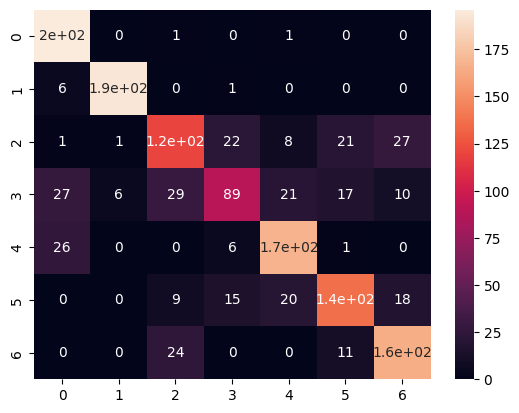

In [156]:
pre = net.predict(test_datatset)
pre = np.argmax(pre, axis=1)
cm = confusion_matrix(test_datatset.classes, pre)
sns.heatmap(cm, annot=True);

In [157]:
print(classification_report(test_datatset.classes, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       198
           1       0.94      0.97      0.96       200
           2       0.60      0.57      0.59       200
           3       0.55      0.42      0.47       199
           4       0.80      0.86      0.83       200
           5       0.65      0.70      0.68       199
           6       0.79      0.77      0.78       200

    accuracy                           0.75      1396
   macro avg       0.74      0.75      0.75      1396
weighted avg       0.74      0.75      0.75      1396

